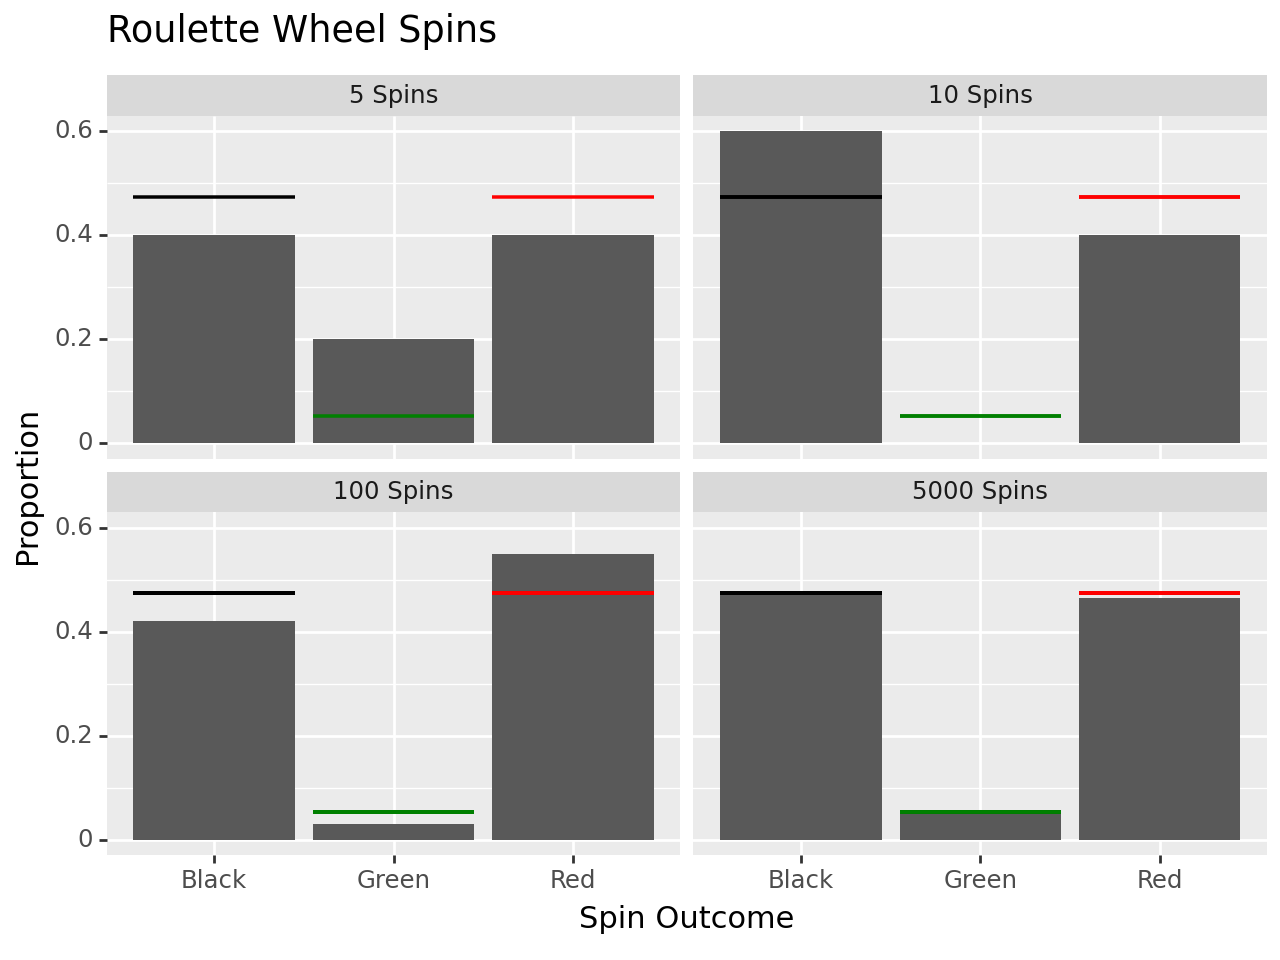

<Figure Size: (640 x 480)>

In [1]:
#### Simulate Flipping a Loaded Coin ####
# Roulette Wheel

# Importing necessary libraries
import pandas as pd
import random
from plotnine import ggplot, aes, geom_bar, facet_wrap, ylab, xlab, ggtitle, geom_segment, after_stat
random.seed(1234)

# Perform simulations
ns = [5, 10, 100, 5000] # Numbers of Flips
probs = [18/38, 18/38, 2/38] # Probabilities of red, black, green
outcomes = ["Red", "Black", "Green"]
x = random.choices(outcomes, k = ns[0], weights = probs)
x2 = random.choices(outcomes, k = ns[1], weights = probs)
x3 = random.choices(outcomes, k = ns[2], weights = probs)
x4 = random.choices(outcomes, k = ns[3], weights = probs)

# Organize results
d = pd.DataFrame({
  'spins' : [*x, *x2, *x3, *x4],
  'wheel' : [*[str(ns[0]) + " Spins"]*ns[0], *[str(ns[1]) + " Spins"]*ns[1], *[str(ns[2]) + " Spins"]*ns[2], *[str(ns[3]) + " Spins"]*ns[3]]
})

d['wheel'] = d['wheel'].astype("category").cat.reorder_categories([str(ns[0]) + " Spins", str(ns[1]) + " Spins", str(ns[2]) + " Spins", str(ns[3]) + " Spins"], ordered = True)

# Plot the results
(ggplot(d, aes(x = 'spins', y = after_stat('prop'), group = 1)) +
  geom_bar() +
  geom_segment(aes(x = .55, y = 18/38, xend = 1.45, yend = 18/38), color = "black") +
  geom_segment(aes(x = 1.55, y = 2/38, xend = 2.45, yend = 2/38), color = "green") +
  geom_segment(aes(x = 2.55, y = 18/38, xend = 3.45, yend = 18/38), color = "red") +
  facet_wrap('wheel', nrow = 2) +
  ylab("Proportion") +
  xlab("Spin Outcome") +
  ggtitle("Roulette Wheel Spins")
)